## Deep Learning Challenge

### Loading the CIFAR10 data

[Guide](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(f'train shape: {train_images.shape}')
print(f'train label: {train_labels.shape}')
print(f'test shape: {test_images.shape}')
print(f'test label: {test_labels.shape}')

train shape: (50000, 32, 32, 3)
train label: (50000, 1)
test shape: (10000, 32, 32, 3)
test label: (10000, 1)


In [4]:
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [5]:
# normalize data between 0 and 1
train_images = train_images / 255
test_images = test_images / 255

#### 1. baseline CNN architecture with 1 VGG block

In [23]:
# initialize model
model = Sequential()
# 1. convolution
model.add(Convolution2D(filters=32, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        input_shape=(32, 32, 3), 
                        activation='relu'))
model.add(Convolution2D(filters=32, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        activation='relu'))
# 2. pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3. flattening
model.add(Flatten())
# 4. full connection
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# 5. compile CNN model
opt = SGD(learning_rate=0.03, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# train the model
history = model.fit(train_images, train_labels,
                   epochs=50,
                   batch_size=128,
                   validation_data=(test_images, test_labels))

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 1.8131 - accuracy: 0.3425 - val_loss: 1.6775 - val_accuracy: 0.3775
Epoch 2/50
391/391 [==============================] - 3s 6ms/step - loss: 1.5828 - accuracy: 0.4256 - val_loss: 1.4906 - val_accuracy: 0.4618
Epoch 3/50
391/391 [==============================] - 3s 6ms/step - loss: 1.4847 - accuracy: 0.4615 - val_loss: 1.4669 - val_accuracy: 0.4649
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.4270 - accuracy: 0.4833 - val_loss: 1.4095 - val_accuracy: 0.4918
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3651 - accuracy: 0.5081 - val_loss: 1.3392 - val_accuracy: 0.5187
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3279 - accuracy: 0.5227 - val_loss: 1.4250 - val_accuracy: 0.4985
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2899 - accuracy: 0.5350 - val_loss: 1.3500 - val_accuracy: 0.5192
Epoch 

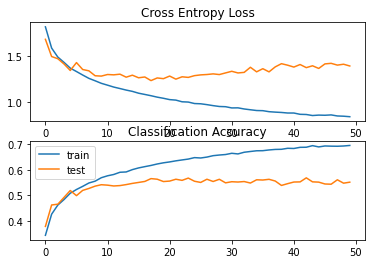

In [25]:
# plot history
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [26]:
# evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test lose: {test_loss}')
print(f'test accuracy: {test_acc}')

313/313 [==============================] - 0s 880us/step - loss: 1.3882 - accuracy: 0.5515
test lose: 1.3881596326828003
test accuracy: 0.5515000224113464


#### 2. CNN architecture with 2 VGG blocks

In [35]:
# initialize model
model = Sequential()
# first VGG stack
model.add(Convolution2D(filters=32, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        input_shape=(32, 32, 3), 
                        activation='relu',
                        data_format='channels_last'))
model.add(Convolution2D(filters=32, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        activation='relu',
                        data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
# second VGG stack
model.add(Convolution2D(filters=64, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        activation='relu',
                        data_format='channels_last'))
model.add(Convolution2D(filters=64, 
                        kernel_size=(3, 3), 
                        strides=3, 
                        kernel_initializer='he_uniform', 
                        padding='same',
                        activation='relu',
                        data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.03, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_19/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_38/Relu)' with input shapes: [?,1,1,64].